In [99]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from lightgbm import LGBMClassifier

from sklearn.svm import SVC
from catboost import CatBoostClassifier
import optuna
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.feature_selection import RFE
from tqdm import tqdm
import xgboost as xgb


import warnings
warnings.filterwarnings('ignore')

In [100]:
train_data=pd.read_csv("/kaggle/input/playground-series-s4e2/train.csv",index_col=[0])
test_data=pd.read_csv("/kaggle/input/playground-series-s4e2/test.csv",index_col=[0])

In [101]:
train_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II


In [102]:
test_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
id,,,,,,,,,,,,,,,,
20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34593,Male,23.327836,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
34594,Female,29.000000,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
34595,Female,22.935612,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation


Gender
Female    10422
Male      10336
Name: count, dtype: int64


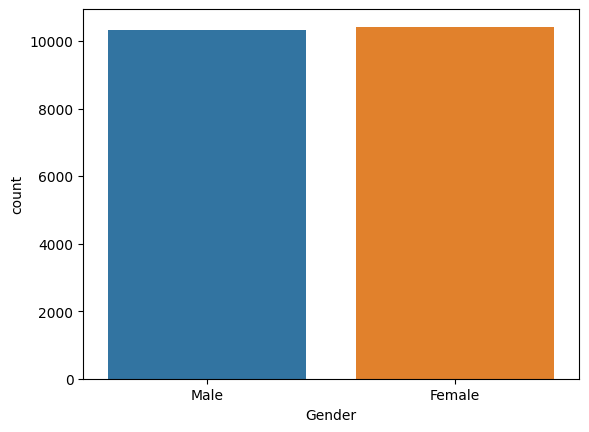

In [103]:
sns.countplot(data=train_data,x=train_data['Gender'])
print(train_data['Gender'].value_counts())

<Axes: xlabel='Height', ylabel='Density'>

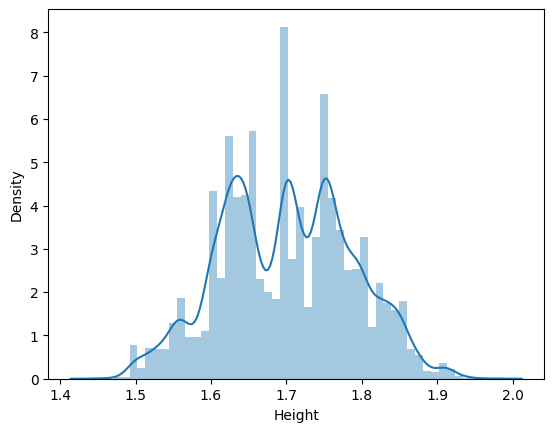

In [104]:
sns.distplot(train_data["Height"])

<Axes: >

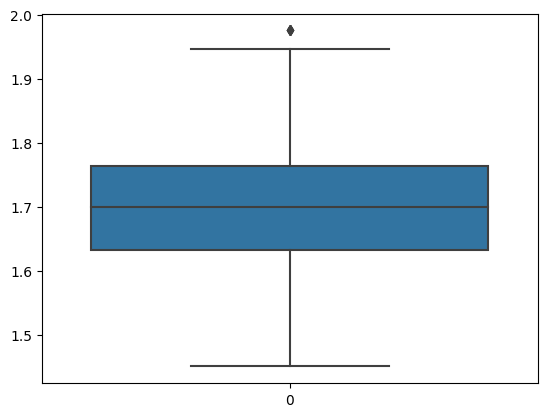

In [105]:
sns.boxplot(train_data["Height"])

In [106]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             20758

In [107]:
num_col=train_data.select_dtypes(['int64','float']).columns.tolist()

In [108]:
num_col

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

In [109]:
train_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,Male,25.137087,1.766626,114.187096,yes,yes,2.919584,3.000000,Sometimes,no,2.151809,no,1.330519,0.196680,Sometimes,Public_Transportation,Obesity_Type_II
20754,Male,18.000000,1.710000,50.000000,no,yes,3.000000,4.000000,Frequently,no,1.000000,no,2.000000,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
20755,Male,20.101026,1.819557,105.580491,yes,yes,2.407817,3.000000,Sometimes,no,2.000000,no,1.158040,1.198439,no,Public_Transportation,Obesity_Type_II


In [110]:
train_data['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

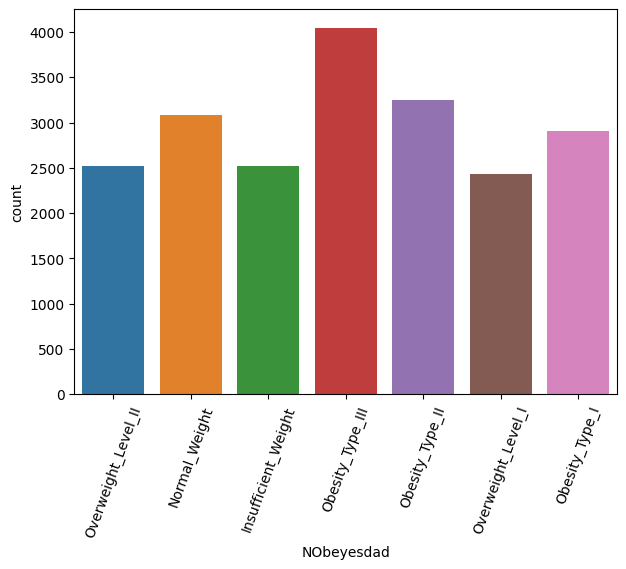

In [111]:
plt.figure(figsize=(7,5))

sns.countplot(data=train_data,x=train_data['NObeyesdad'])
plt.xticks(rotation=70)
plt.show()

<Axes: xlabel='SMOKE', ylabel='count'>

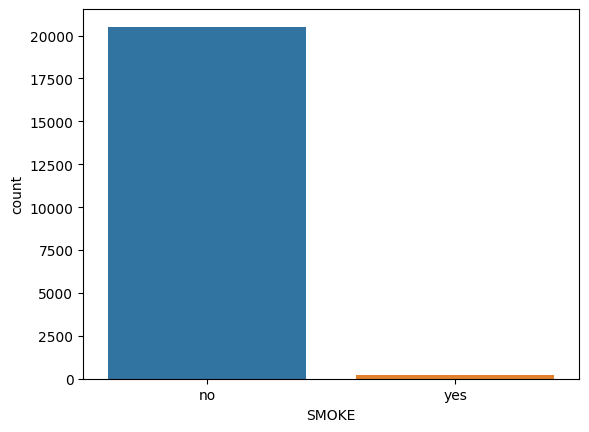

In [112]:
sns.countplot(data=train_data,x=train_data['SMOKE'])

In [113]:
train_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [114]:
train_data.groupby(train_data["Gender"])['NObeyesdad'].value_counts(ascending=True)

Gender  NObeyesdad         
Female  Obesity_Type_II           8
        Overweight_Level_II     755
        Overweight_Level_I     1070
        Obesity_Type_I         1267
        Insufficient_Weight    1621
        Normal_Weight          1660
        Obesity_Type_III       4041
Male    Obesity_Type_III          5
        Insufficient_Weight     902
        Overweight_Level_I     1357
        Normal_Weight          1422
        Obesity_Type_I         1643
        Overweight_Level_II    1767
        Obesity_Type_II        3240
Name: count, dtype: int64

## In females The dominent class in OT3 but in male the it is OL2 or we can say tha it is visa versa  

##### oBasity_type_3 Dominent in female
##### oBasity_type_2 Dominent in male

In [115]:
train_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


### Feature Engineering

In [116]:
obj_train=train_data.select_dtypes("object").columns.tolist()

In [117]:
obj_test=test_data.select_dtypes("object").columns.tolist()

In [118]:
train_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
id,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [119]:
train_data[["Weight","Height"]].corr()

,Weight,Height
Weight,1.000000,0.416677
Height,0.416677,1.000000


In [120]:
train_data["Wei_hei"]=train_data["Height"]*train_data["Weight"]

In [121]:
train_data[["Weight","Height","Wei_hei"]].corr()

,Weight,Height,Wei_hei
Weight,1.000000,0.416677,0.989336
Height,0.416677,1.000000,0.537325
Wei_hei,0.989336,0.537325,1.000000


In [122]:
train_data["Wei_hei"]

id
0        138.838752
1         88.920000
2         85.856681
3        224.575826
4        179.546924
            ...    
20753    201.725893
20754     85.500000
20755    192.109721
20756    141.984192
20757    214.597595
Name: Wei_hei, Length: 20758, dtype: float64

In [123]:
test_data["Wei_hei"]=test_data['Height']*test_data['Weight']

In [124]:
test_data["Wei_hei"]

id
20758    222.985910
20759    105.600000
20760    183.399327
20761    161.011303
20762    170.608623
            ...    
34593    134.320253
34594     98.580000
34595     70.361244
34596     85.860000
34597    219.248014
Name: Wei_hei, Length: 13840, dtype: float64

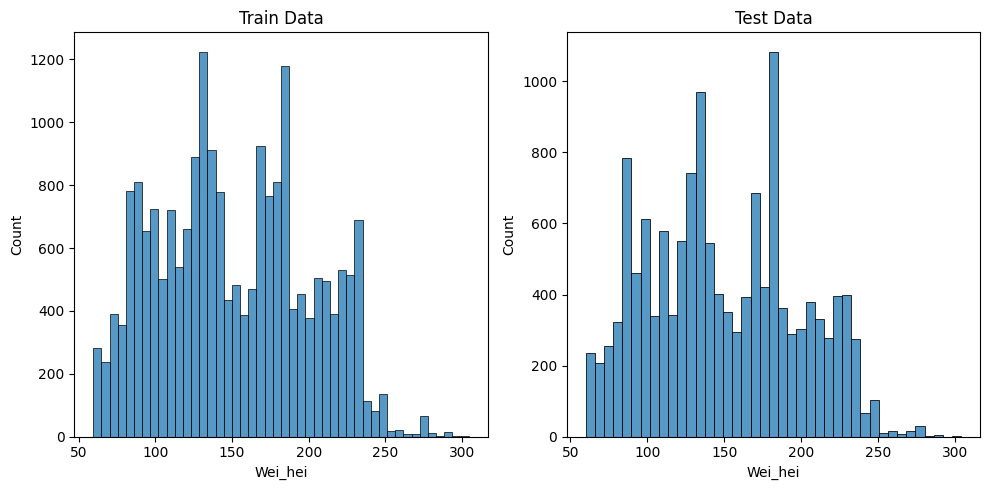

In [125]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data (replace this with your actual data)


# Create subplots
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)  # First subplot
sns.histplot(train_data["Wei_hei"])
plt.title('Train Data')

plt.subplot(1, 2, 2)  # Second subplot
sns.histplot(test_data['Wei_hei'])
plt.title('Test Data')

plt.tight_layout()
plt.show()


In [126]:
train_data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad', 'Wei_hei'],
      dtype='object')

In [127]:
test_data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'Wei_hei'],
      dtype='object')

In [128]:
train_data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Wei_hei
id,,,,,,,,,,,,,,,,,,
0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II,138.838752
1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight,88.920000
2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight,85.856681
3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III,224.575826
4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II,179.546924


In [129]:
test_data.groupby("Gender")["Wei_hei"].count()

Gender
Female    6965
Male      6875
Name: Wei_hei, dtype: int64

In [130]:
train_data["MTRANS"].unique()

array(['Public_Transportation', 'Automobile', 'Walking', 'Motorbike',
       'Bike'], dtype=object)

In [131]:
num_col=train_data.select_dtypes(exclude='object').columns.tolist()

In [132]:
train_data[num_col].corr()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Wei_hei
Age,1.000000,-0.011713,0.283381,0.034414,-0.048479,-0.016325,-0.192259,-0.296154,0.259043
Height,-0.011713,1.000000,0.416677,-0.071546,0.191383,0.183706,0.295278,0.076433,0.537325
Weight,0.283381,0.416677,1.000000,0.245682,0.095947,0.317914,-0.084845,-0.086471,0.989336
FCVC,0.034414,-0.071546,0.245682,1.000000,0.113349,0.101299,-0.089822,-0.147843,0.214806
NCP,-0.048479,0.191383,0.095947,0.113349,1.000000,0.080949,0.100871,0.067459,0.111406
CH2O,-0.016325,0.183706,0.317914,0.101299,0.080949,1.000000,0.082932,-0.010654,0.316204
FAF,-0.192259,0.295278,-0.084845,-0.089822,0.100871,0.082932,1.000000,0.021213,-0.029442
TUE,-0.296154,0.076433,-0.086471,-0.147843,0.067459,-0.010654,0.021213,1.000000,-0.072586
Wei_hei,0.259043,0.537325,0.989336,0.214806,0.111406,0.316204,-0.029442,-0.072586,1.000000


In [133]:
train_data['Wei_hei']

id
0        138.838752
1         88.920000
2         85.856681
3        224.575826
4        179.546924
            ...    
20753    201.725893
20754     85.500000
20755    192.109721
20756    141.984192
20757    214.597595
Name: Wei_hei, Length: 20758, dtype: float64

In [134]:
train_data["CH_WE"]=train_data['CH2O']*train_data["Weight"]
test_data["CH_WE"]=test_data['CH2O']*test_data['Weight']

In [135]:
num_col=train_data.select_dtypes(exclude='object').columns.tolist()

<Axes: >

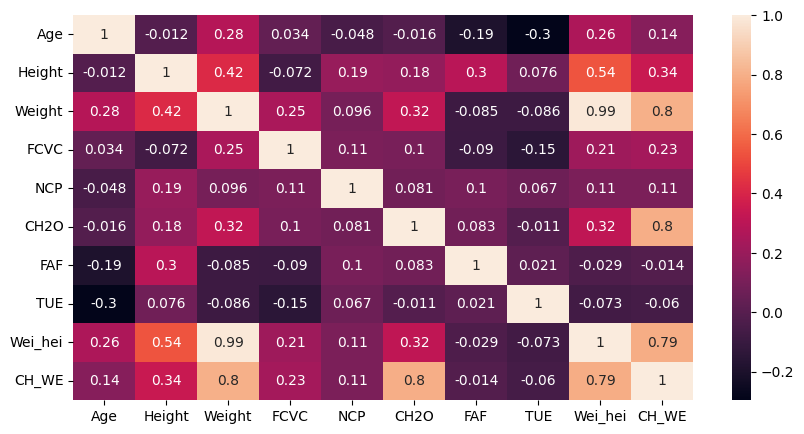

In [136]:
plt.figure(figsize=(10,5))
sns.heatmap(train_data[num_col].corr(),annot=True)

## Data transformation

In [137]:
sc=StandardScaler()

In [138]:
for i in tqdm(num_col):
    train_data[[i]]=sc.fit_transform(train_data[[i]])
    test_data[[i]]=sc.transform(test_data[[i]])


    

100%|██████████| 10/10 [00:00<00:00, 180.60it/s]


In [139]:
obj_train

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS',
 'NObeyesdad']

In [140]:
obj_test

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [141]:
le=LabelEncoder()


In [142]:
obj_test

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [143]:
for i in tqdm(obj_test):
    train_data[i]=le.fit_transform(train_data[i])
    test_data[i]=le.fit_transform(test_data[i])


100%|██████████| 8/8 [00:00<00:00, 119.73it/s]


In [144]:
train_data['NObeyesdad']=le.fit_transform(train_data['NObeyesdad'])

### Splitting the data set

In [145]:
X=train_data.drop('NObeyesdad',axis=1)

In [146]:
y=train_data['NObeyesdad']

In [147]:
print(X.shape)
print(y.shape)

(20758, 18)
(20758,)


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [177]:
rf=RandomForestClassifier(n_estimators=461,
 max_depth= 21,
 min_samples_split= 3,
 min_samples_leaf= 2,
verbose=False)
base_line=RFE(rf,n_features_to_select=15,step=1,verbose=False)


baseline2 = CatBoostClassifier(iterations=1000, learning_rate=0.1, depth=6, loss_function='MultiClass', random_state=42,verbose=False)


# baseline3=RFE(LGBMClassifier(),n_features_to_select=15,step=1)

param = {"objective": "multiclass",
    "metric": "multi_logloss",
    "verbosity": -1,
    "boosting_type": "gbdt",
    "random_state": 42,
    "num_class": 7,
    'learning_rate': 0.030962211546832760,
    'n_estimators': 500,
    'lambda_l1': 0.009667446568254372,
    'lambda_l2': 0.04018641437301800,
    'max_depth': 10,
    'colsample_bytree': 0.40977129346872643,
    'subsample': 0.9535797422450176,
    'min_child_samples': 26
    }

baseline3 = LGBMClassifier(**param,verbose=0)


params = {
    'objective': 'binary:logistic',  # Assuming it's a binary classification task
    'eta': 0.09490526051760186,
    'max_depth': 7,
    'subsample': 0.7,
    'colsample_bytree': 0.75,
    'lambda': 1.0838500231160633,
    'alpha': 0.005674449344549094
}
# Create the XGBClassifier object with the specified hyperparameters
baseline4 = xgb.XGBClassifier(**params)
# baseline4=RFE(baseline4,n_features_to_select=15,step=1)
# Train the model











In [179]:
voting_clf = VotingClassifier(estimators=[
    ("RFE_RF", base_line),
#     ("CAT", baseline2),
    ("LGBM", baseline3),
    ("XGB", baseline4)
], voting='hard')  # You can use 'soft' if you prefer soft voting

# Train Voting Classifier
voting_clf.fit(X_train, y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

In [180]:
accuracy_score(y_pred,y_test)

0.9088631984585742

In [182]:
y_pred=le.inverse_transform(y_pred)

In [185]:
voting_clf.fit(X,y)

VotingClassifier(estimators=[('RFE_RF',
                              RFE(estimator=RandomForestClassifier(max_depth=21,
                                                                   min_samples_leaf=2,
                                                                   min_samples_split=3,
                                                                   n_estimators=461,
                                                                   verbose=False),
                                  n_features_to_select=15, verbose=False)),
                             ('LGBM',
                              LGBMClassifier(colsample_bytree=0.4097712934687264,
                                             lambda_l1=0.009667446568254372,
                                             lambda_l2=0.040186414373018,
                                             learning_rate=0.0309622115468327...
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            lambda=1.0838500231160633,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=7,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, ...))])

In [186]:
yhat=voting_clf.predict(test_data)

In [187]:
yhat=le.inverse_transform(yhat)

In [188]:
dict1={"id":test_data.index,
      "NObeyesdad":yhat}

dict1

df=pd.DataFrame(dict1)

df.to_csv("/kaggle/working/Sub3.csv",index=False)

## Votting

In [ ]:
# rf=RandomForestClassifier()

# def objectiive(trial):
#     n_estimators = trial.suggest_int('n_estimators', 50, 500)
#     max_depth = trial.suggest_int('max_depth', 5, 30)
#     min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
#     min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10)
#     model=RandomForestClassifier(n_estimators=n_estimators,
#         max_depth=max_depth,
#         min_samples_split=min_samples_split,
#         min_samples_leaf=min_samples_leaf,
#         random_state=42
#     )
#     model.fit(X_train,y_train)

#     return model.score(X_test,y_test)




# study=optuna.create_study(direction='maximize')
# study.optimize(objectiive,n_trials=100)


# study.best_trial

